In [7]:
import numpy as np
#Imports
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
styles = ["Abstract-Art", "Abstract-Expressionism", "Academicism", "Art-Informel", "Art-Nouveau-(Modern)", "Baroque","Cubism", "Color-Field-Painting", "Conceptual-Art", "Expressionism", "Impressionism", "Mannerism-(Late-Renaissance)", "Minimalism", "Naïve-Art-(Primitivism)", "Pop-Art", "Post-Impressionism", "Neoclassicism", "Neo-Expressionism", "Northern-Renaissance", "Realism", "Rococo", "Romanticism", "Surrealism", "Symbolism"]

<AxesSubplot: >

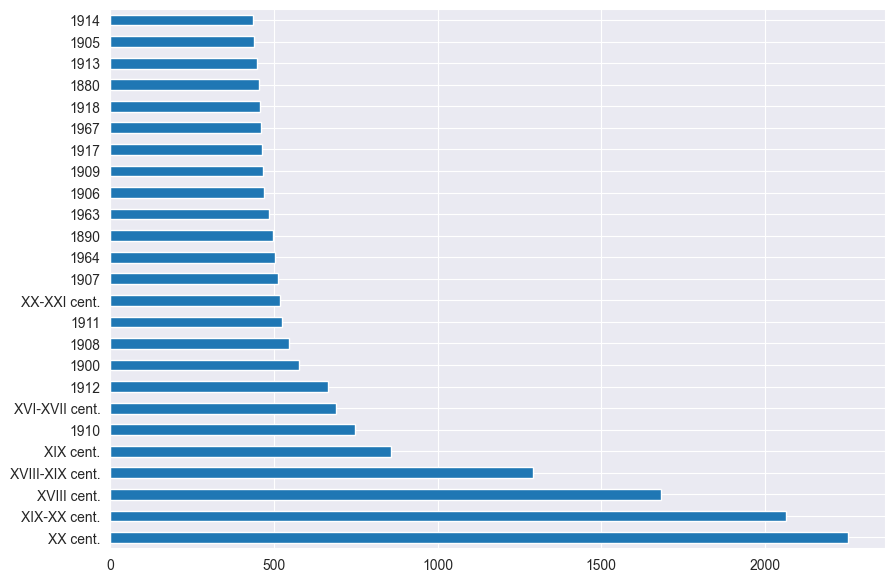

In [9]:
df = pd.read_csv('data/wikiart_scraped.csv')
df = df[df["Style"].isin(styles)]
df["Date"].value_counts()[:25].plot.barh(figsize=(10,7))

In [11]:
#create csv
from pathlib import  Path
counts = df["Style"].value_counts()
filepath = "stylescount.csv"
counts.to_csv(filepath)

In [12]:
# use only numeric dates
import math
df = df[df.Date.str.isnumeric()] # only accept numeric dates
df["Date"] = pd.to_numeric(df["Date"])
df = df[df["Date"]>=1000]

def round_down(num):
    math.floor(num/10)*10

df["Date"] = df["Date"].apply(lambda x: (math.floor(x/10))*10)

counts = df["Date"].value_counts()
filepath = "datecount.csv"
counts.to_csv(filepath)

<AxesSubplot: >

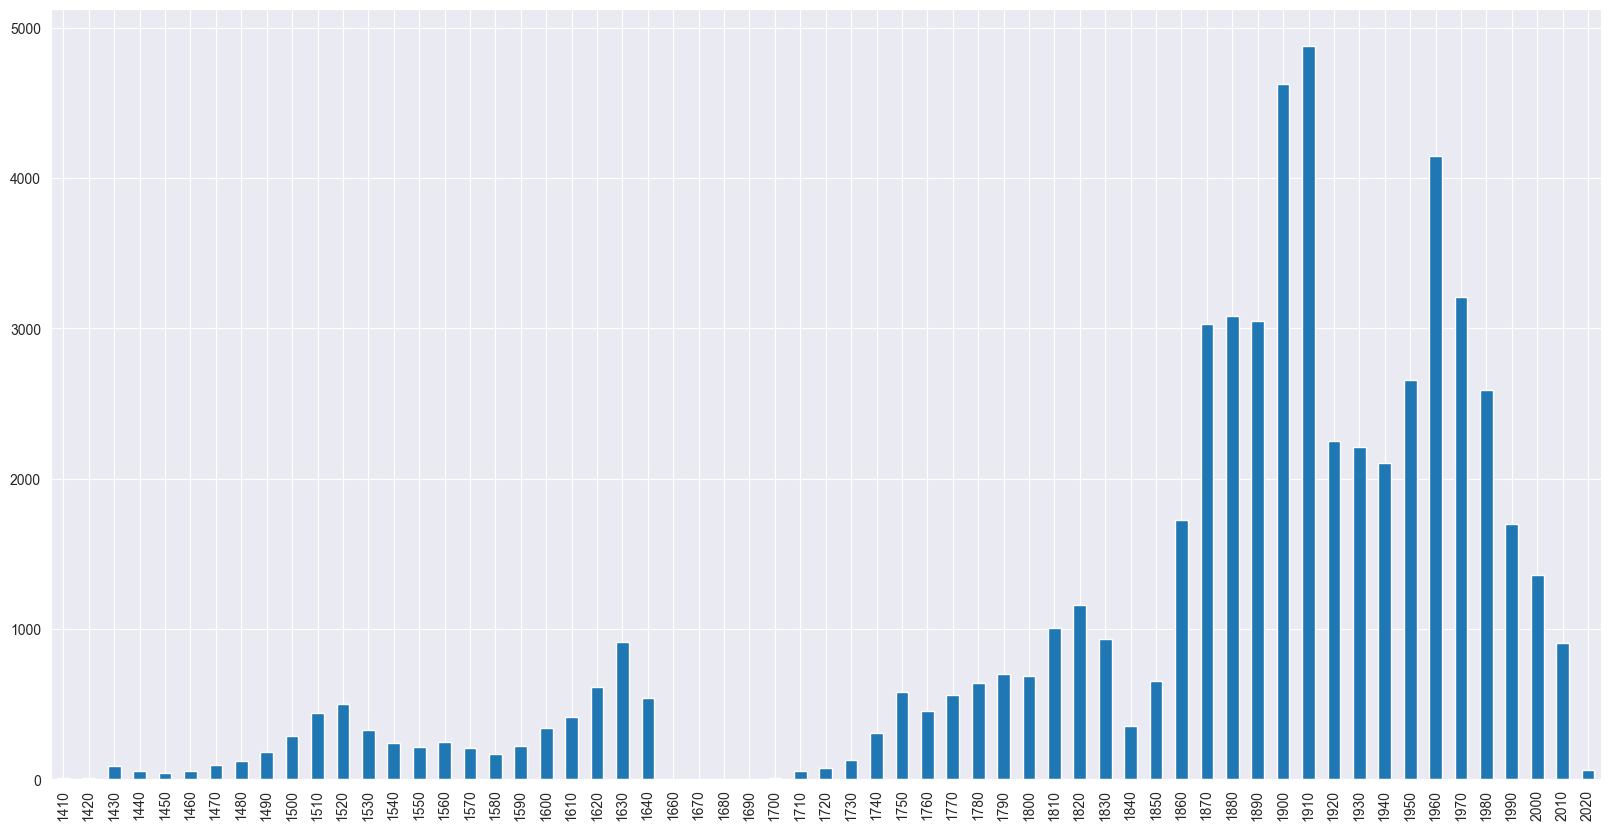

In [13]:
df["Date"].value_counts()[:].sort_index(ascending=True).plot.bar(figsize=(20,10))


In [6]:
df["id"] = df.index
df["id"] = df["id"].format(formatter={':0>6'})
#for index, row in df.iterrows():
#    row["id"] = "wa" + str(':0>6'.format(index))

AttributeError: 'Series' object has no attribute 'format'

In [7]:
print(df)

                     Style                                            Artwork  \
432              Geometric                                         Pluralidad   
433              Geometric                                            EC19-B5   
434              Geometric                                            EC19-B4   
435              Geometric                                            EC19-i3   
436              Geometric                                  émigration forcée   
...                    ...                                                ...   
124165  Street-Photography                         Portrait of the corn stalk   
124166  Street-Photography                             The other side of life   
124167  Street-Photography                    The bonfire during construction   
124168  Street-Photography                                          Limpidity   
124169  Street-Photography  My daughter Eleonora and nephew Noa watch fire...   

                     Artist

In [66]:
def get_style_idx(st):
    for i in range(styles):
        if styles[i]==st:
            return i
    return None

styles = ["Symbolism", "Expressionism", "Impressionism" ,"Surrealism", "Baroque", "Neoclassicism", "Romanticism", "Realism"]
df = df[df["Style"].isin(styles)]
#df["Style"]=df["Style"].astype('category')
#df["Stylecode"]=df["Style"].cat.codes
#df["newcol"] = tf.keras.utils.to_categorical(df["Stylecode"], num_classes=len(styles))
print(pd.get_dummies(df, columns=["Style"]))

                                                 Artwork             Artist  \
12260                           Assumption of the Virgin         Guido Reni   
12261                                     Butcher's Shop  Annibale Carracci   
12262                         Landscape with Roman Ruins          Paul Bril   
12263  The Holy Family with Sts. Anthony Abbot, Cathe...  Agostino Carracci   
12264                   Preparativos Para La Crucifixión  Francesco Ribalta   
...                                                  ...                ...   
75604                         Yard of the artist's house    Martiros Sarian   
75605                                            Yerevan    Martiros Sarian   
75606                                            Yerevan    Martiros Sarian   
75607                       Sergei Yesenin, Russian poet      Jury Annenkov   
75608                         Dancing Bar in Baden-Baden       Max Beckmann   

       Date                                        

In [49]:
print(df['Style'].cat.categories)

AttributeError: Can only use .cat accessor with a 'category' dtype

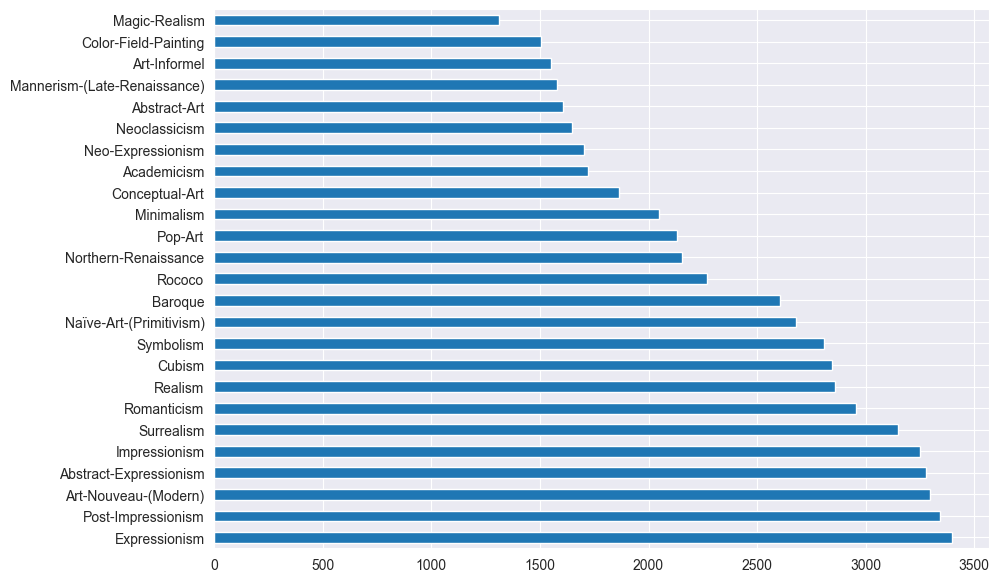

In [20]:
ax = df["Style"].value_counts()[:25].plot.barh(figsize=(10,7))
